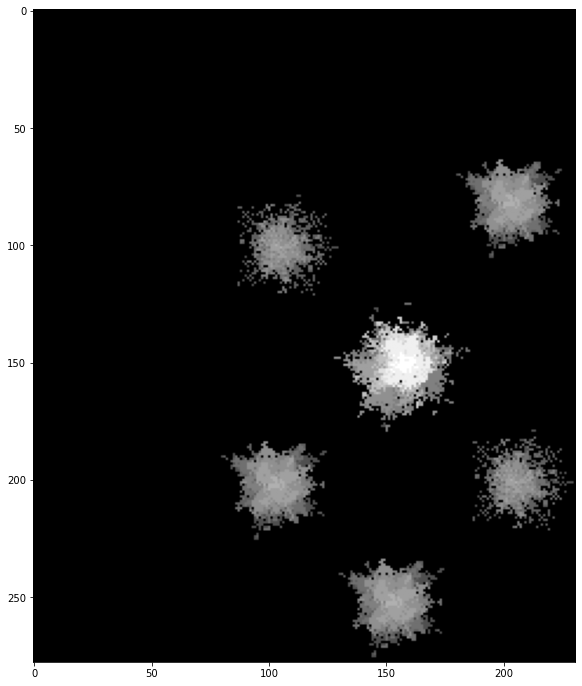

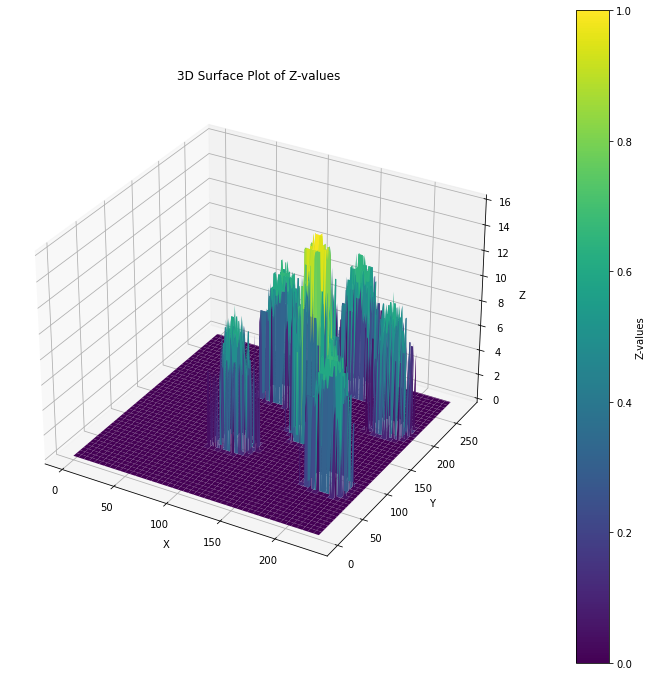

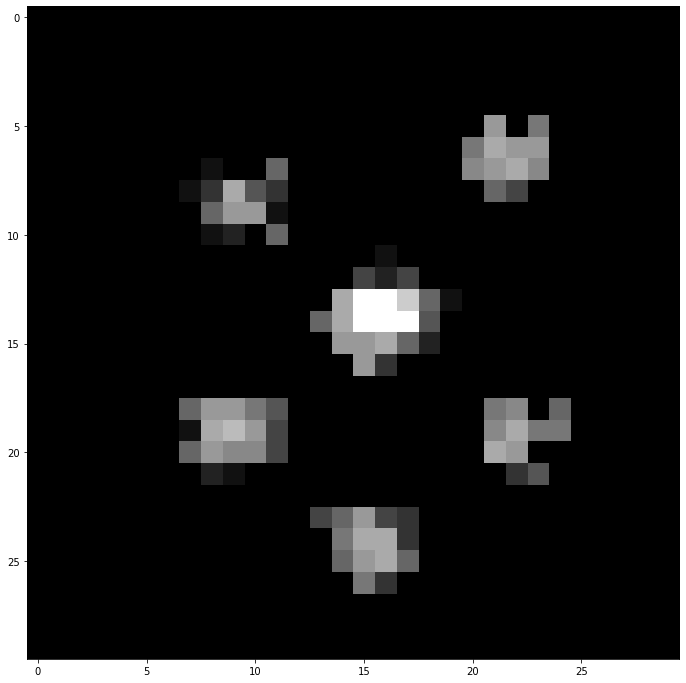

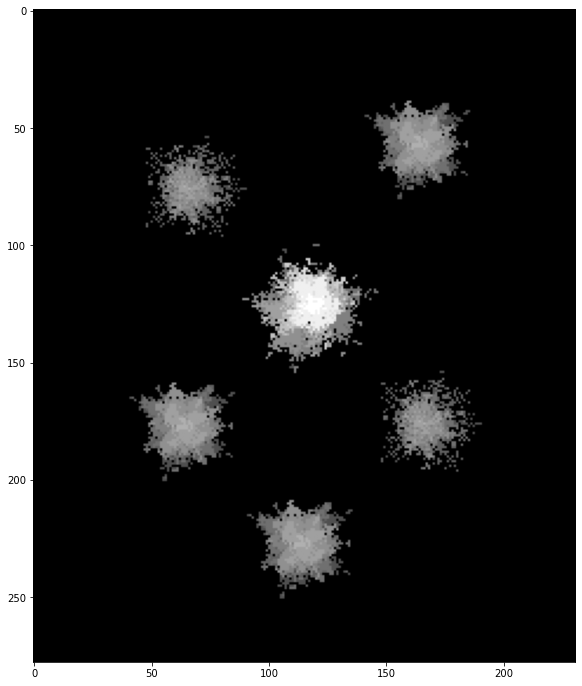

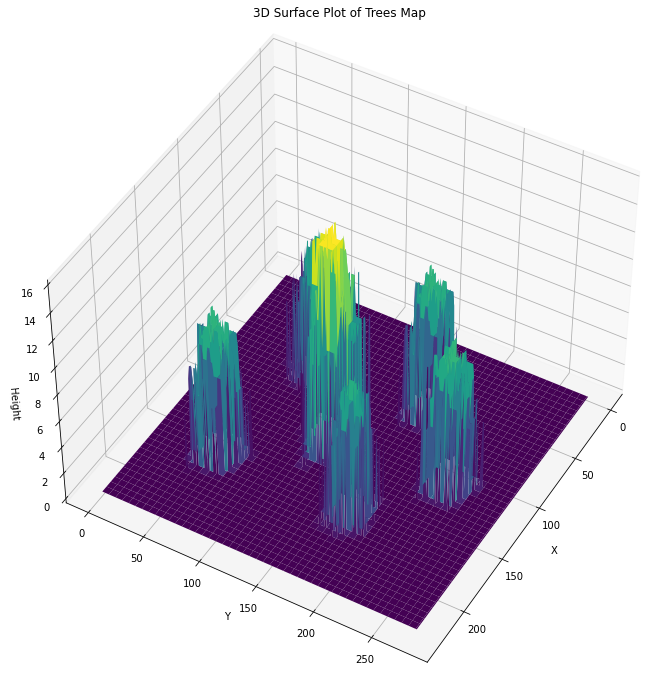

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from map_preprocessing import (
    Color,
    get_obstacle_map_from_pcd,
    display_map,
    save_png_from_numpy,
    save_numpy_as_npy,
    manual_resize_map,
    resize_map,
    center_nonzero_data,
)

'''
import pcl

# Load the PCD file
cloud = pcl.load("Forest_Env.pcd")

# Access the point data
points = cloud.to_array()


# Extract the x, y, and z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Print example coordinates
print("X coordinates:", x)
print("Y coordinates:", y)
print("Z coordinates:", z)
'''

# Call the functions as needed
pcd_filename = "forest_env.asc"
grid_size = 0.1 # Adjust this value as needed

obstacle_map = get_obstacle_map_from_pcd(pcd_filename, grid_size)

save_numpy_as_npy(obstacle_map, "obstacle_map.npy")
save_png_from_numpy(obstacle_map, "obstacle_map.png")

# Save the obstacle_map as float64
np.save("obstacle_map_float64.npy", obstacle_map.astype(np.float64))

# Display the obstacle map
display_map(obstacle_map, figsize=(12, 12))

# Load the data from the .npy file
data = np.load("obstacle_map.npy")

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# Load the obstacle map data from the .npy file
obstacle_map = np.load("obstacle_map.npy")

# Create grids of coordinates for the X and Y values
x_grid, y_grid = np.meshgrid(
    np.arange(obstacle_map.shape[1]),
    np.arange(obstacle_map.shape[0])
)

# Create a larger figure by specifying the figure size
fig = plt.figure(figsize=(12, 12))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')

# Plot the Z-values as a 3D surface
surface = ax.plot_surface(x_grid, y_grid, obstacle_map, cmap='viridis')

# Create a ScalarMappable with a colormap for the legend
sm = ScalarMappable(cmap='viridis')
sm.set_array([])  # You can set any array here, even an empty one

# Add a colorbar legend
cbar = fig.colorbar(sm, ax=ax, label='Z-values', pad=0.1)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Surface Plot of Z-values")

plt.savefig("3d_surface_plot.png")

# Show the plot
plt.show()

'''
# Resize the obstacle_map to 30x30
new_shape = (30, 30)
resized_obstacle_map = manual_resize_map(obstacle_map, new_shape)

# Display the resized map
display_map(resized_obstacle_map, figsize=(12, 12))
'''

# Resize the obstacle_map to 30x30
new_shape = (30, 30)
resized_obstacle_map = resize_map(obstacle_map, new_shape)

resized_obstacle_map = np.round(resized_obstacle_map)

resized_obstacle_map = center_nonzero_data(resized_obstacle_map)

resized_obstacle_map = np.clip(resized_obstacle_map, 0, None)

# Display the resized map
display_map(resized_obstacle_map, figsize=(12, 12))

# Save the obstacle_map as float64
# np.save("resized_obstacle_map_float64.npy", resized_obstacle_map.astype(np.float64))

# save_png_from_numpy(resized_obstacle_map, "resized_obstacle_map.png")

def center_of_mass(matrix):
    # Assuming non-zero values indicate features of interest
    total_mass = np.sum(matrix)
    indices = np.indices(matrix.shape)
    center_y = np.sum(indices[0] * matrix) / total_mass
    center_x = np.sum(indices[1] * matrix) / total_mass
    return int(center_y), int(center_x)

def shift_to_center(matrix, target_center):
    current_center = center_of_mass(matrix)
    shift_y = target_center[0] - current_center[0]
    shift_x = target_center[1] - current_center[1]
    return np.roll(matrix, shift=(shift_y, shift_x), axis=(0, 1))

# Main processing part
pcd_filename = "forest_env.asc"
grid_size = 0.1  # Grid size for the map

# Generate obstacle map from PCD
obstacle_map = get_obstacle_map_from_pcd(pcd_filename, grid_size)

# Center the features in the obstacle map
target_center = (obstacle_map.shape[0] // 2, obstacle_map.shape[1] // 2)
centered_obstacle_map = shift_to_center(obstacle_map, target_center)

# Save the centered map in various formats
save_numpy_as_npy(centered_obstacle_map, "centered_obstacle_map.npy")
save_png_from_numpy(centered_obstacle_map, "centered_obstacle_map.png")

# Display the centered obstacle map
display_map(centered_obstacle_map, figsize=(12, 12))

# 3D Visualization of the centered map
x_grid, y_grid = np.meshgrid(
    np.arange(centered_obstacle_map.shape[1]),
    np.arange(centered_obstacle_map.shape[0])
)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x_grid, y_grid, centered_obstacle_map, cmap='viridis')


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')
ax.set_title("3D Surface Plot of Trees Map")

# Adjust the view angle
ax.view_init(elev=45, azim=30)

# Add a colorbar
# sm = ScalarMappable(cmap='viridis')
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax, label='Height', pad=0.1)

plt.savefig("3d_centered_surface_plot.png")
plt.show()
